# Handling Images with NumPy

In [8]:
import cv2 as cv
import numpy as np 
from matplotlib import pyplot as plt 
%matplotlib inline

In [9]:
img = cv.imread('a.png', -1)
# img = cv.imread('x.png',-1)
##-1 flag is used to read the image as it is, without any changes
img.shape

(800, 1200, 4)

(800, 1200, 3)


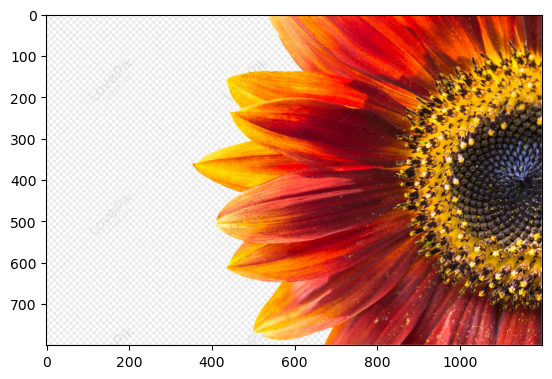

In [10]:
# convert the image to RGB (OpenCV uses BGR)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
print(img_rgb.shape)
# plot image inline with matplotlib
plt.imshow(img_rgb)
plt.show()

Explanation of plt.imshow() and plt.show()
1. plt.imshow(img_rgb)
This function displays an image using Matplotlib.
It interprets the image as an array and maps pixel values to colors.
Since OpenCV loads images in BGR format, converting it to RGB ensures correct color representation.
2. plt.show()
It renders and displays all Matplotlib figures.
In Jupyter notebooks, images might display automatically, but in scripts, calling plt.show() is necessary to visualize the image.

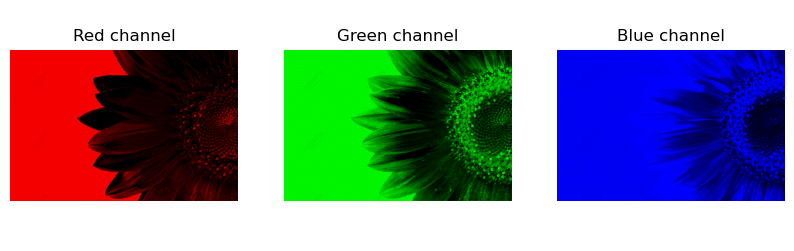

In [11]:
# Ensure the image has 3 channels (RGB), ignoring alpha if present
if img_rgb.shape[-1] == 4: # RGBA
    img_rgb = img_rgb[:, :, :3]
# create a placeholder image to store the image with only 0 values
"""
It creates an array of zeros with the same shape as one channel of the image.
This is used to replace unwanted channels when splitting RGB.
"""
zero_channel = np.zeros_like(img[:,:,0])
# split the image into its 3 channels
red_channel = img[:,:,0]
red_img = cv.merge((red_channel, zero_channel, zero_channel))
green_channel = img[:,:,1]
green_img = cv.merge((zero_channel, green_channel, zero_channel))
blue_channel = img[:,:,2]
blue_img = cv.merge((zero_channel, zero_channel, blue_channel))
# plot the 3 images in a subplot
plt.figure(figsize=(10,3)) # width 10, height 3
plt.axis('off')
plt.subplot(131) # 1 row 1 column 1st plot
plt.imshow(red_img) # in the original code they used cmap = "gray"
plt.title('Red channel')
plt.axis('off')
plt.subplot(132) # 1 row 1 column 2nd plot
plt.imshow(green_img)
plt.title('Green channel')
plt.axis('off')
plt.subplot(133) # 1 row 1 column 3rd plot
plt.imshow(blue_img)
plt.title('Blue channel')
plt.axis('off')
# plt.axis('off')
plt.show()

Producing gray scale image and calculating time taken for it

(800, 1200)
Time taken by OpenCV function: 0.0032677650451660156 seconds


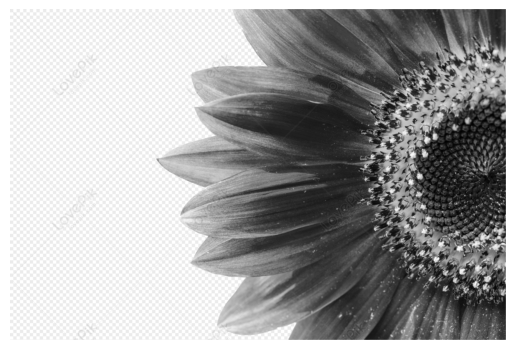

In [12]:
import time  # Import time module for measuring execution time

start = time.time()  # Record start time

# Convert the image to grayscale using OpenCV
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # converts to GRAY
# the formula to compute average used here is 0.299*R + 0.587*G + 0.114*B
# because the human eye is more sensitive to green color, so it is given more weight

print(gray_img.shape)  # Print the dimensions of the grayscale image

end = time.time()  # Record end time

# Calculate and print the time taken
diff_lib = end - start
print(f'Time taken by OpenCV function: {diff_lib} seconds')

#plt.imshow(gray_img)  # Display the grayscale image, but it will be more greenish, because of the formula
plt.imshow(gray_img, cmap = "gray")
plt.axis('off')  # Remove axis labels and ticks
plt.show()  # Show the image


In [13]:
"""
start = time.time()
# using for loop
gray_img = np.zeros((img.shape[0], img.shape[1]))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        gray_img[i,j] = (img[i,j,0]//3 + img[i,j,1]//3 + img[i,j,2]//3) 
end = time.time()
diff_for = end- start
print(f'Time taken by for loop: {diff_for} seconds')
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.show()
# time differece
speedup = diff_for/diff_lib 
print(f'Speedup by using numpy is: {speedup:.2f}x')
"""

"\nstart = time.time()\n# using for loop\ngray_img = np.zeros((img.shape[0], img.shape[1]))\nfor i in range(img.shape[0]):\n    for j in range(img.shape[1]):\n        gray_img[i,j] = (img[i,j,0]//3 + img[i,j,1]//3 + img[i,j,2]//3) \nend = time.time()\ndiff_for = end- start\nprint(f'Time taken by for loop: {diff_for} seconds')\nplt.imshow(gray_img, cmap='gray')\nplt.axis('off')\nplt.show()\n# time differece\nspeedup = diff_for/diff_lib \nprint(f'Speedup by using numpy is: {speedup:.2f}x')\n"

Plotting histogram

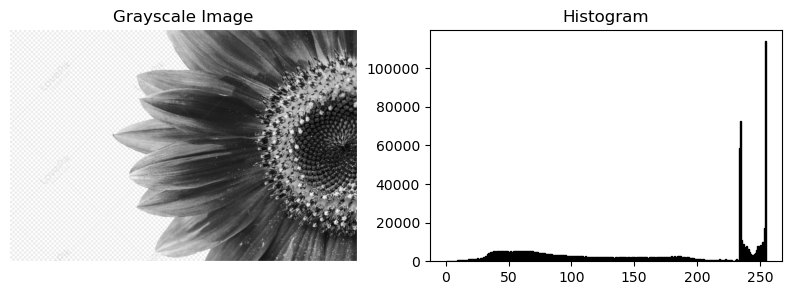

In [14]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.title('Grayscale Image')
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
# plt.show()
plt.subplot(122)
plt.title('Histogram')
plt.hist(gray_img.ravel(), bins=256, range=(0.0, 255.0), fc='k', ec='k')
# bins tells how many buckets
# range tells the min and max of X axis
# length of each bin = bins/range
plt.show()

Let X be the np matrix of the grayscale image
• obtain Y = X.T (transpose of X)
• obtain Z = Y.X (matrix multiplication of Y and X)

In [15]:
X = gray_img
print(f"{X.shape=}")
Y = X.T
print(f"{Y.shape=}")
# multiply Y and X
# Z = np.matmul(Y,X)
# print(f"{Z.shape=}")

X.shape=(800, 1200)
Y.shape=(1200, 800)


Obtain a portion of the grayscale image and save it in an array A

In [16]:
P = int(X.shape[0]*.4),int(X.shape[1]*.4)
Q = int(X.shape[0]*.7),int(X.shape[1]*.7)
print(f"{P=}")
print(f"{Q=}")
# crop the image
A = gray_img[P[0]:Q[0], P[1]:Q[1]]

P=(320, 480)
Q=(560, 840)


Display the partimage A

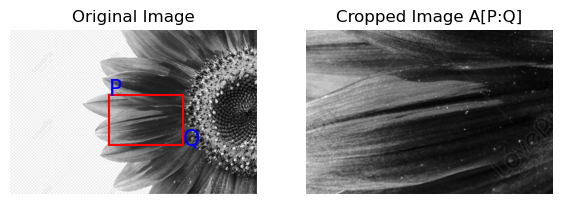

In [17]:
# display the originall and cropped image
plt.figure(figsize=(7,4))
plt.subplot(121)
plt.title('Original Image')
plt.imshow(gray_img, cmap='gray')
# display P and Q on the image
plt.plot([P[1], Q[1], Q[1], P[1], P[1]], [P[0], P[0], Q[0], Q[0], P[0]], 'r')
plt.text(P[1], P[0], 'P', color='b', fontsize=16)
plt.text(Q[1], Q[0], 'Q', color='b', fontsize=16)
plt.axis('off')
plt.subplot(122)
plt.title('Cropped Image A[P:Q]')
plt.imshow(A, cmap='gray')
plt.axis('off')
plt.show()

How the above works:
1. Compute Points P and Q Dynamically
    P = int(X.shape[0] * .4), int(X.shape[1] * .4)  # (40% of height, 40% of width)
    Q = int(X.shape[0] * .7), int(X.shape[1] * .7)  # (70% of height, 70% of width)
    P and Q define the top-left and bottom-right corners of the region to be cropped.
    X.shape[0] is the height, and X.shape[1] is the width of the image.
    The multiplication by 0.4 and 0.7 ensures the crop region is a proportion of the image dimensions, making it adaptable to different image sizes.

2. Crop the Image
    A = gray_img[P[0]:Q[0], P[1]:Q[1]]
    This extracts a rectangular region from gray_img using slicing.
    Row range: P[0] to Q[0] (from 40% to 70% of height).
    Column range: P[1] to Q[1] (from 40% to 70% of width).
    This creates a new cropped image A.

3. Display the Original and Cropped Image
    plt.subplot(121)
    plt.title('Original Image')
    plt.imshow(gray_img, cmap='gray') # Displays the original grayscale image.

    Mark Points P and Q on Original Image
    plt.plot([P[1], Q[1], Q[1], P[1], P[1]], [P[0], P[0], Q[0], Q[0], P[0]], 'r')
    plt.text(P[1], P[0], 'P', color='b', fontsize=16)
    plt.text(Q[1], Q[0], 'Q', color='b', fontsize=16)
    
    plt.plot([...], [...], 'r'): Draws a red rectangle around the cropped region.
    plt.text(P[1], P[0], 'P', color='b', fontsize=16): Marks P in blue.
    plt.text(Q[1], Q[0], 'Q', color='b', fontsize=16): Marks Q in blue.

    Understanding plt.plot(x_values, y_values, 'r')
        plt.plot() is used to draw a connected line between given points.
        The first list (x_values) represents horizontal (column) coordinates.
        The second list (y_values) represents vertical (row) coordinates.
        'r' specifies the color of the line (red).
    Code Breakdown:
        plt.plot([P[1], Q[1], Q[1], P[1], P[1]],  # X-coordinates
        [P[0], P[0], Q[0], Q[0], P[0]],  # Y-coordinates
        'r')  # Red color
        P = (P[0], P[1]) (Top-left corner of the rectangle)
        Q = (Q[0], Q[1]) (Bottom-right corner of the rectangle)

    Points Used to Draw the Rectangle
        Point	X (Column)	    Y (Row)	        Meaning
        P	    P[1]	        P[0]	        Top-left corner
        Q	    Q[1]	        P[0]	        Top-right corner
        Q	    Q[1]	        Q[0]	        Bottom-right corner
        P	    P[1]	        Q[0]	        Bottom-left corner
        P	    P[1]	        P[0]	        Back to Top-left (Closing the loop)

    How This Works
        The order ensures the rectangle is drawn in a clockwise direction, starting from P (top-left).
        The last point (P[1], P[0]) is repeated to close the rectangle.
    
    Visual Representation
        Let's say the image matrix is indexed as follows:

(0,0) --------------> X (columns)
 |  P (Top-left) ---- Q (Top-right)
 |   |                     |
 |   |                     |
 |   P (Bottom-left) ---- Q (Bottom-right)
 V
 Y (rows)

